# Load in the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_test.csv")
df_val = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_val.csv")

In [ ]:
df_train

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,title,publish_date,body,tweet_ids,fake_news,tweets_count,...,source_url_dailymail,source_url_elle,source_url_ew,source_url_hollywoodreporter,source_url_other,source_url_radaronline,source_url_today,source_url_usatoday,source_url_usmagazine,source_url_variety
0,0,0,0,6334,Kate Middleton Introduces a Mental Health Film...,2017-09-19,Kate Middleton wants kids to know it's OK to t...,"['909874031226179584', '909874938743422977', '...",0,42,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,3993,Topless activists crash Woody Allen concert in...,2017-07-13,Maeve McDermott\n\nUSA TODAY\n\nWoody Allen's ...,"['885215491786244097', '885215532491952128', '...",0,49,...,0,0,0,0,0,0,0,1,0,0
2,2,2,2,7342,"Jax Taylor, Brittany Cartwright, Lala Kent Sla...",2018-12-04,The cast of Vanderpump Rules has some choice w...,"['965963973383221248', '965964322051706880', '...",0,39,...,0,0,0,0,0,0,0,0,1,0
3,3,3,3,4965,Jon Hamm Slams Social Media: It's the 'Visual ...,2017-06-02,Jon Hamm is definitely not a fan of social med...,"['870829201619898369', '870829428758245376', '...",0,37,...,0,0,0,0,1,0,0,0,0,0
4,4,4,4,8422,'Bachelor' stars Nick Viall and Vanessa Grimal...,2017-08-29,"Fans were shocked when former ""Bachelor"" Nick ...","['902314666415669248', '902314904048291840', '...",0,45,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,6694,6694,6694,2435,Brad Pitt Now Seeing His 6 Kids Several Times ...,2018-03-26,Brad Pitt is now seeing his kids regularly and...,"['978376714605809666', '978377045213433856', '...",1,5,...,0,0,0,0,1,0,0,0,0,0
6695,6695,6695,6695,8049,Brooklyn Beckham and new model girlfriend Hana...,2018-12-18,They confirmed their romance earlier this mont...,"['929191473815478272', '929191900770430976', '...",0,52,...,1,0,0,0,0,0,0,0,0,0
6696,6696,6696,6696,2735,8 Reasons Why Rihanna and Drake Could Be the N...,2016-07-27,We're not sure how long this round of Rihanna ...,"['758428860098547712', '758428859972726784', '...",1,110,...,0,0,0,0,1,0,0,0,0,0
6697,6697,6697,6697,2769,Celine Dion donates concert proceeds to Vegas ...,2017-10-04,Celine Dion pledges proceeds from the show at ...,"['915528047004209152', '915529285171122176', '...",0,234,...,0,0,0,0,1,0,0,0,0,0


# Pre-processing using TF-IDF - Every features

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
# Import packages and modules
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer# Create a dataframe
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit

In [7]:
def remove_punctuation(document):
    new_string = ''.join([char for char in document if char.isalnum() or char == ' '])
    return new_string

## Title

In [8]:
def preprocess_title(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords

**Train**

In [9]:
# Create an instance of TfidfVectorizer
vectoriser_title = TfidfVectorizer(analyzer=preprocess_title)

# Fit to the data and transform to feature matrix
df_title_train = df_train['title']
df_title_train = df_title_train.apply(remove_digit)
df_title_train = df_title_train.apply(remove_punctuation)
title_train = vectoriser_title.fit_transform(df_title_train)

# Convert sparse matrix to dataframe
title_train = pd.DataFrame.sparse.from_spmatrix(title_train)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_title.vocabulary_.items()}

# Rename each column using the mapping
for col in title_train.columns:
    title_train.rename(columns={col: col_map[col]}, inplace=True)
title_train

,aap,aaron,ab,abandon,abba,abbey,abbott,abby,abbys,abc,...,zolciak,zolciakbiermann,zombie,zone,zoo,zooey,zooeys,zoë,zsa,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
title_train.columns[:100]

Index(['aap', 'aaron', 'ab', 'abandon', 'abba', 'abbey', 'abbott', 'abby',
       'abbys', 'abc', 'abcs', 'abductors', 'abdul', 'abedin', 'abel',
       'abigail', 'aboard', 'abominably', 'abortion', 'abound', 'abraham',
       'abrahams', 'abroad', 'abs', 'absence', 'absentee', 'absolute',
       'absolutely', 'absurd', 'abuse', 'abuser', 'abusive', 'academy',
       'accent', 'accept', 'acceptance', 'access', 'accessorized', 'accessory',
       'accident', 'accidental', 'accidentally', 'acclaim', 'accompany',
       'accord', 'account', 'accurate', 'accusation', 'accusations', 'accuse',
       'accuser', 'accusers', 'achieve', 'achievement', 'acid', 'acm', 'acms',
       'acne', 'acre', 'across', 'acs', 'act', 'action', 'actively',
       'activism', 'activist', 'activists', 'actor', 'actorfilm', 'actors',
       'actress', 'actresses', 'actual', 'actually', 'ad', 'ada', 'adam',
       'adamant', 'adams', 'add', 'addict', 'addiction', 'address', 'adele',
       'adg', 'adidas', 'adki

In [11]:
l = [ x + '_title' for x in title_train.columns]
title_train.columns = l

**Test**

In [12]:
# Fit to the data and transform to feature matrix
df_title_test = df_test['title']
df_title_test = df_title_test.apply(remove_digit)
df_title_test = df_title_test.apply(remove_punctuation)
title_test = vectoriser_title.transform(df_title_test)

# Convert sparse matrix to dataframe
title_test = pd.DataFrame.sparse.from_spmatrix(title_test)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_title.vocabulary_.items()}

# Rename each column using the mapping
for col in title_test.columns:
    title_test.rename(columns={col: col_map[col]}, inplace=True)
title_test

,aap,aaron,ab,abandon,abba,abbey,abbott,abby,abbys,abc,...,zolciak,zolciakbiermann,zombie,zone,zoo,zooey,zooeys,zoë,zsa,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
l = [ x + '_title' for x in title_test.columns]
title_test.columns = l

**Validation**

In [14]:
# Fit to the data and transform to feature matrix
df_title_val = df_val['title']
df_title_val = df_title_val.apply(remove_digit)
df_title_val = df_title_val.apply(remove_punctuation)
title_val = vectoriser_title.transform(df_title_val)

# Convert sparse matrix to dataframe
title_val = pd.DataFrame.sparse.from_spmatrix(title_val)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_title.vocabulary_.items()}

# Rename each column using the mapping
for col in title_val.columns:
    title_val.rename(columns={col: col_map[col]}, inplace=True)
title_val

,aap,aaron,ab,abandon,abba,abbey,abbott,abby,abbys,abc,...,zolciak,zolciakbiermann,zombie,zone,zoo,zooey,zooeys,zoë,zsa,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
l = [ x + '_title' for x in title_val.columns]
title_val.columns = l

## Body

In [16]:
def preprocess_body(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords

**Train**

In [17]:
# Create an instance of TfidfVectorizer
vectoriser_body = TfidfVectorizer(analyzer=preprocess_body)

# Fit to the data and transform to feature matrix
df_body_train = df_train['body']
df_body_train = df_body_train.apply(remove_digit)
body_train = vectoriser_body.fit_transform(df_body_train)

# Convert sparse matrix to dataframe
body_train = pd.DataFrame.sparse.from_spmatrix(body_train)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_body.vocabulary_.items()}

# Rename each column using the mapping
from tqdm import tqdm
for col in tqdm(body_train.columns):
    body_train.rename(columns={col: col_map[col]}, inplace=True)
body_train

100%|██████████| 52551/52551 [22:17<00:00, 39.30it/s]


,_,__,___,________,__linagarcia,__what,_actress,_amygray_,_beenwavey,_brianadejesus,...,яндекс,ツ,진주,ﬁnd,ﬁnds,𝐟𝐚𝐭𝐭𝐚,𝐩𝐞𝐫𝐫𝐲,𝐩𝐮𝐬𝐬,𝐭𝐡𝐞,𝓲𝓽𝔃𝓮𝓵
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
body_train.dtypes

_               Sparse[float64, 0]
__              Sparse[float64, 0]
___             Sparse[float64, 0]
________        Sparse[float64, 0]
__linagarcia    Sparse[float64, 0]
                       ...        
𝐟𝐚𝐭𝐭𝐚           Sparse[float64, 0]
𝐩𝐞𝐫𝐫𝐲           Sparse[float64, 0]
𝐩𝐮𝐬𝐬            Sparse[float64, 0]
𝐭𝐡𝐞             Sparse[float64, 0]
𝓲𝓽𝔃𝓮𝓵           Sparse[float64, 0]
Length: 52551, dtype: object

In [19]:
l = [ x + '_body' for x in body_train.columns]
body_train.columns = l

In [20]:
df_train_2 = pd.concat([df_train, title_train, body_train], axis = 1)

In [21]:
df_train_2.columns[df_train_2.isna().any()].tolist()

[]

In [22]:
pd.isnull(df_train_2).sum()

Unnamed: 0          0
Unnamed: 0.1        0
Unnamed: 0.1.1      0
Unnamed: 0.1.1.1    0
title               0
                   ..
𝐟𝐚𝐭𝐭𝐚_body          0
𝐩𝐞𝐫𝐫𝐲_body          0
𝐩𝐮𝐬𝐬_body           0
𝐭𝐡𝐞_body            0
𝓲𝓽𝔃𝓮𝓵_body          0
Length: 61377, dtype: int64

**Test**

In [23]:
# Fit to the data and transform to feature matrix
df_body_test = df_test['body']
df_body_test = df_body_test.apply(remove_digit)
body_test = vectoriser_body.transform(df_body_test)

# Convert sparse matrix to dataframe
body_test = pd.DataFrame.sparse.from_spmatrix(body_test)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_body.vocabulary_.items()}

# Rename each column using the mapping
from tqdm import tqdm
for col in tqdm(body_test.columns):
    body_test.rename(columns={col: col_map[col]}, inplace=True)
body_test

100%|██████████| 52551/52551 [29:07<00:00, 30.07it/s]


,_,__,___,________,__linagarcia,__what,_actress,_amygray_,_beenwavey,_brianadejesus,...,яндекс,ツ,진주,ﬁnd,ﬁnds,𝐟𝐚𝐭𝐭𝐚,𝐩𝐞𝐫𝐫𝐲,𝐩𝐮𝐬𝐬,𝐭𝐡𝐞,𝓲𝓽𝔃𝓮𝓵
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
l = [ x + '_body' for x in body_test.columns]
body_test.columns = l

In [25]:
df_test_2 = pd.concat([df_test, title_test, body_test], axis = 1)

In [26]:
df_test_2.columns[df_test_2.isna().any()].tolist()

[]

**Validation**

In [27]:
# Fit to the data and transform to feature matrix
df_body_val = df_val['body']
df_body_val = df_body_val.apply(remove_digit)
df_body_val = df_body_val.apply(remove_punctuation)
body_val = vectoriser_body.transform(df_body_val)

# Convert sparse matrix to dataframe
body_val = pd.DataFrame.sparse.from_spmatrix(body_val)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_body.vocabulary_.items()}

# Rename each column using the mapping
from tqdm import tqdm
for col in tqdm(body_val.columns):
    body_val.rename(columns={col: col_map[col]}, inplace=True)
body_val

100%|██████████| 52551/52551 [30:14<00:00, 28.97it/s]


,_,__,___,________,__linagarcia,__what,_actress,_amygray_,_beenwavey,_brianadejesus,...,яндекс,ツ,진주,ﬁnd,ﬁnds,𝐟𝐚𝐭𝐭𝐚,𝐩𝐞𝐫𝐫𝐲,𝐩𝐮𝐬𝐬,𝐭𝐡𝐞,𝓲𝓽𝔃𝓮𝓵
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
l = [ x + '_body' for x in body_val.columns]
body_val.columns = l

In [29]:
df_val_2 = pd.concat([df_val, title_val, body_val], axis = 1)

In [30]:
print(df_val.shape, title_val.shape, body_val.shape)

(1002, 28) (1002, 8798) (1002, 52551)


In [31]:
pd.isna(df_val_2).sum() #number of Na values per column

Unnamed: 0          0
Unnamed: 0.1        0
Unnamed: 0.1.1      0
Unnamed: 0.1.1.1    0
title               0
                   ..
𝐟𝐚𝐭𝐭𝐚_body          0
𝐩𝐞𝐫𝐫𝐲_body          0
𝐩𝐮𝐬𝐬_body           0
𝐭𝐡𝐞_body            0
𝓲𝓽𝔃𝓮𝓵_body          0
Length: 61377, dtype: int64

In [32]:
body_val.dtypes

__body               Sparse[float64, 0]
___body              Sparse[float64, 0]
____body             Sparse[float64, 0]
_________body        Sparse[float64, 0]
__linagarcia_body    Sparse[float64, 0]
                            ...        
𝐟𝐚𝐭𝐭𝐚_body           Sparse[float64, 0]
𝐩𝐞𝐫𝐫𝐲_body           Sparse[float64, 0]
𝐩𝐮𝐬𝐬_body            Sparse[float64, 0]
𝐭𝐡𝐞_body             Sparse[float64, 0]
𝓲𝓽𝔃𝓮𝓵_body           Sparse[float64, 0]
Length: 52551, dtype: object

In [33]:
title_val.dtypes

aap_title           Sparse[float64, 0]
aaron_title         Sparse[float64, 0]
ab_title            Sparse[float64, 0]
abandon_title       Sparse[float64, 0]
abba_title          Sparse[float64, 0]
                           ...        
zooey_title         Sparse[float64, 0]
zooeys_title        Sparse[float64, 0]
zoë_title           Sparse[float64, 0]
zsa_title           Sparse[float64, 0]
zuckerberg_title    Sparse[float64, 0]
Length: 8798, dtype: object

In [34]:
#df_train_2.to_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_train_tf_idf.csv")
#df_test_2.to_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_test_tf_idf.csv")
#df_val_2.to_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_val_tf_idf.csv")

# Predictive Models - Every Features

In [35]:
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from xgboost import XGBClassifier
from datetime import datetime
import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [36]:
df_train_2 = df_train_2.set_index('index')
df_test_2 = df_test_2.set_index('index')
df_val_2 = df_val_2.set_index('index')

X_train = df_train_2.drop(columns=['fake_news','title','body','tweet_ids','publish_date','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1'])
X_test = df_test_2.drop(columns=['fake_news','title','body','tweet_ids','publish_date','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1'])
X_val = df_val_2.drop(columns=['fake_news','title','body','tweet_ids','publish_date','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1'])

y_train = df_train_2['fake_news']
y_test = df_test_2['fake_news']
y_val = df_val_2['fake_news']

In [37]:
X_val

,tweets_count,Retweet,Like,Reply,Hour,Weekday,Month,source_url_billboard,source_url_dailymail,source_url_elle,...,яндекс_body,ツ_body,진주_body,ﬁnd_body,ﬁnds_body,𝐟𝐚𝐭𝐭𝐚_body,𝐩𝐞𝐫𝐫𝐲_body,𝐩𝐮𝐬𝐬_body,𝐭𝐡𝐞_body,𝓲𝓽𝔃𝓮𝓵_body
index,,,,,,,,,,,,,,,,,,,,,
p_379,5,2,0,0,16,4,7,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_895866,53,1,0,0,18,3,11,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_9109637963,36,7,8,2,16,0,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_857297,86,1,3,1,4,4,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_930760,43,0,1,0,2,0,4,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g_870947,38,7,24,3,19,2,8,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_891755,55,13,72,7,3,0,11,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_908995,15,1,0,1,18,3,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X_train.dtypes[:20]

tweets_count                                 int64
Retweet                                      int64
Like                                         int64
Reply                                        int64
Hour                                         int64
Weekday                                      int64
Month                                        int64
source_url_billboard                         int64
source_url_dailymail                         int64
source_url_elle                              int64
source_url_ew                                int64
source_url_hollywoodreporter                 int64
source_url_other                             int64
source_url_radaronline                       int64
source_url_today                             int64
source_url_usatoday                          int64
source_url_usmagazine                        int64
source_url_variety                           int64
aap_title                       Sparse[float64, 0]
aaron_title                    

In [39]:
def acc(cm):
  return(round((cm[3]+ cm[0])/(cm[2]+cm[3]+cm[1]+cm[0]),3))

def tpr(cm):
  return(round(cm[3]/(cm[2]+cm[3]),3))

def fpr(cm):
  return(round(cm[1]/(cm[0]+cm[1]),3))

def f1(cm):
  return(round(2*cm[3]/(2*cm[3]+cm[2]+cm[1]),3))

## Baseline

In [40]:
y_train.value_counts()

0    4782
1    1917
Name: fake_news, dtype: int64

In [41]:
y_test.value_counts()

0    1837
1     730
Name: fake_news, dtype: int64

In [42]:
acc_baseline = y_test.value_counts()[0] / (y_test.value_counts()[0] + y_test.value_counts()[1])
tpr_baseline = 0
fpr_baseline = 0
f1_baseline = 0

print('Accuracy baseline model :', acc_baseline)
print('TPR baseline model :', tpr_baseline, '\nFPR baseline model :', fpr_baseline)
print('F1 score baseline model :', f1_baseline)

Accuracy baseline model : 0.7156213478768991
TPR baseline model : 0 
FPR baseline model : 0
F1 score baseline model : 0


## Logistic Regression

In [43]:
logreg = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


LogisticRegression(solver='liblinear')

In [44]:
y_pred_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test,y_pred_logreg).ravel()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [45]:
acc_logreg = acc(cm_logreg)
tpr_logreg = tpr(cm_logreg)
fpr_logreg = fpr(cm_logreg)
f1_logreg = f1(cm_logreg)

print('Accuracy logreg model :', acc_logreg)
print('TPR logreg model :', tpr_logreg, '\nFPR logreg model :', fpr_logreg)
print('F1 score logreg model :', f1_logreg)

Accuracy logreg model : 0.838
TPR logreg model : 0.558 
FPR logreg model : 0.051
F1 score logreg model : 0.662


#### CART

##### CART Cross validation

In [ ]:
# Cross validation

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'f1', cv=10, verbose=1)
dtc_cv_acc.fit(X_val, y_val)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse co

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (CV f1): ', dtc_cv_acc.best_score_)

##### CART 

In [46]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.01, # found by cross validation
                             criterion = 'gini',
                             min_samples_split = 20,
                             max_depth = 30,
                             random_state = 88)

dtc = dtc.fit(X_train, y_train) #fit the decision tree

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [ ]:
 # print the Decision tree

from sklearn.tree import plot_tree

print('Node count =', dtc.tree_.node_count)
plt.figure(figsize=(20,12))
plot_tree(dtc, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          max_depth = 4,
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=10) 
plt.show()

In [47]:
cm_dtc = confusion_matrix(y_test, dtc.predict(X_test)).ravel()

acc_dtc = acc(cm_dtc)
tpr_dtc = tpr(cm_dtc)
fpr_dtc = fpr(cm_dtc)
f1_dtc = f1(cm_dtc)

print('Accuracy Decision Tree Classifier :', acc_dtc)
print('TPR dtc model :', tpr_dtc, '\nFPR dtc model :', fpr_dtc)
print('F1 score dtc model :', f1_dtc)
print(f1_score(y_test,dtc.predict(X_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Accuracy Decision Tree Classifier : 0.83
TPR dtc model : 0.512 
FPR dtc model : 0.044
F1 score dtc model : 0.632


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


0.6317567567567567


#### Random Forest

##### Random Forest Cross validation

In [ ]:
# Cross validation for classifier

grid_values = {'max_features': np.linspace(1,500,50, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 


rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='f1', cv=5)
rf_cv.fit(X_val, y_val)

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1 score): ', rf_cv.best_params_['max_features'])
print('Grid best score (CV f1 score): ', rf_cv.best_score_)

##### Random Forest

In [48]:
rf = RandomForestClassifier(max_features=500, # found by cross validation
                            min_samples_leaf=5,
                            n_estimators = 500,
                            random_state=88,
                            verbose=2)
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  4.2min finished


RandomForestClassifier(max_features=500, min_samples_leaf=5, n_estimators=500,
                       random_state=88, verbose=2)

In [49]:
cm_rf = confusion_matrix(y_test, rf.predict(X_test)).ravel()

acc_rf = acc(cm_rf)
tpr_rf = tpr(cm_rf)
fpr_rf = fpr(cm_rf)
f1_rf = f1(cm_rf)

print('Accuracy rf :', acc_rf)
print('TPR rf model :', tpr_rf, '\nFPR rf model :', fpr_rf)
print('F1 score rf model :', f1_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Accuracy rf : 0.825
TPR rf model : 0.433 
FPR rf model : 0.02
F1 score rf model : 0.584


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished


In [ ]:
# most important features

pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*rf.feature_importances_}).round(1)
              
              
plt.figure(figsize=(8,20))
plt.barh(X_train.columns, 100*rf.feature_importances_)
plt.show()

#### Boosting

##### Boosting Cross validation

In [ ]:
# With Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'max_leaf_nodes': np.linspace(2, 100, 9, dtype='int32'),
               'min_samples_leaf': [10],
               'n_estimators': [500],
               'learning_rate': [0.01],
               'random_state': [88]}

gbr = GradientBoostingClassifier()
gbr_cv = GridSearchCV(gbr, param_grid=grid_values, scoring='f1', cv=5)
gbr_cv.fit(X_val, y_val)

  0%|          | 0/5 [00:00<?, ?it/s]


ValueError: ignored

##### Boosting - hyper parameters tuning on validation set

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# Boosting Regressor

gbr = GradientBoostingClassifier(n_estimators=500, learning_rate= 0.001, random_state=88, verbose=1, max_leaf_nodes=3) 
gbr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


      Iter       Train Loss   Remaining Time 
         1           1.1969           29.99m
         2           1.1965           30.67m
         3           1.1960           31.30m
         4           1.1956           30.83m
         5           1.1951           30.44m
         6           1.1947           29.95m
         7           1.1943           30.04m
         8           1.1938           29.83m
         9           1.1934           29.61m
        10           1.1930           29.49m
        20           1.1887           28.76m
        30           1.1845           27.89m
        40           1.1805           27.00m
        50           1.1765           26.50m
        60           1.1726           26.30m
        70           1.1688           26.52m
        80           1.1651           26.72m
        90           1.1614           26.56m
       100           1.1578           26.22m
       200           1.1239           20.82m
       300           1.0950           13.91m
       40

GradientBoostingClassifier(learning_rate=0.001, max_leaf_nodes=3,
                           n_estimators=500, random_state=88, verbose=1)

In [51]:
cm_gbr = confusion_matrix(y_test, gbr.predict(X_test)).ravel()

acc_gbc = acc(cm_gbr)
tpr_gbc = tpr(cm_gbr)
fpr_gbc = fpr(cm_gbr)
f1_gbc = f1(cm_gbr)

print('Accuracy gbc :', acc_gbc)
print('TPR gbc model :', tpr_gbc, '\nFPR gbc model :', fpr_gbc)
print('F1 score gbc model :', f1_gbc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Accuracy gbc : 0.716
TPR gbc model : 0.0 
FPR gbc model : 0.0
F1 score gbc model : 0.0


# Pre-processing using TF-IDF - Only Text

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Import packages and modules
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer# Create a dataframe
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit

In [ ]:
def remove_punctuation(document):
    new_string = ''.join([char for char in document if char.isalnum() or char == ' '])
    return new_string

## Title

In [ ]:
def preprocess_title(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords

**Train**

In [ ]:
# Create an instance of TfidfVectorizer
vectoriser_title = TfidfVectorizer(analyzer=preprocess_title)

# Fit to the data and transform to feature matrix
df_title_train = df_train['title']
df_title_train = df_title_train.apply(remove_digit)
df_title_train = df_title_train.apply(remove_punctuation)
title_train = vectoriser_title.fit_transform(df_title_train)

# Convert sparse matrix to dataframe
title_train = pd.DataFrame.sparse.from_spmatrix(title_train)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_title.vocabulary_.items()}

# Rename each column using the mapping
for col in title_train.columns:
    title_train.rename(columns={col: col_map[col]}, inplace=True)
title_train

,aap,aaron,ab,abandon,abba,abbey,abbott,abby,abbys,abc,...,zolciak,zolciakbiermann,zombie,zone,zoo,zooey,zooeys,zoë,zsa,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
l = [ x + '_title' for x in title_train.columns]
title_train.columns = l

**Test**

In [ ]:
# Fit to the data and transform to feature matrix
df_title_test = df_test['title']
df_title_test = df_title_test.apply(remove_digit)
df_title_test = df_title_test.apply(remove_punctuation)
title_test = vectoriser_title.transform(df_title_test)

# Convert sparse matrix to dataframe
title_test = pd.DataFrame.sparse.from_spmatrix(title_test)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_title.vocabulary_.items()}

# Rename each column using the mapping
for col in title_test.columns:
    title_test.rename(columns={col: col_map[col]}, inplace=True)
title_test

,aap,aaron,ab,abandon,abba,abbey,abbott,abby,abbys,abc,...,zolciak,zolciakbiermann,zombie,zone,zoo,zooey,zooeys,zoë,zsa,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
l = [ x + '_title' for x in title_test.columns]
title_test.columns = l

**Validation**

In [ ]:
# Fit to the data and transform to feature matrix
df_title_val = df_val['title']
df_title_val = df_title_val.apply(remove_digit)
df_title_val = df_title_val.apply(remove_punctuation)
title_val = vectoriser_title.transform(df_title_val)

# Convert sparse matrix to dataframe
title_val = pd.DataFrame.sparse.from_spmatrix(title_val)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_title.vocabulary_.items()}

# Rename each column using the mapping
for col in title_val.columns:
    title_val.rename(columns={col: col_map[col]}, inplace=True)
title_val

,aap,aaron,ab,abandon,abba,abbey,abbott,abby,abbys,abc,...,zolciak,zolciakbiermann,zombie,zone,zoo,zooey,zooeys,zoë,zsa,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
l = [ x + '_title' for x in title_val.columns]
title_val.columns = l

## Body

In [ ]:
def preprocess_body(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords

**Train**

In [ ]:
# Create an instance of TfidfVectorizer
vectoriser_body = TfidfVectorizer(analyzer=preprocess_body)

# Fit to the data and transform to feature matrix
df_body_train = df_train['body']
df_body_train = df_body_train.apply(remove_digit)
body_train = vectoriser_body.fit_transform(df_body_train)

# Convert sparse matrix to dataframe
body_train = pd.DataFrame.sparse.from_spmatrix(body_train)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_body.vocabulary_.items()}

# Rename each column using the mapping
from tqdm import tqdm
for col in tqdm(body_train.columns):
    body_train.rename(columns={col: col_map[col]}, inplace=True)
body_train

100%|██████████| 52551/52551 [20:51<00:00, 42.01it/s]


,_,__,___,________,__linagarcia,__what,_actress,_amygray_,_beenwavey,_brianadejesus,...,яндекс,ツ,진주,ﬁnd,ﬁnds,𝐟𝐚𝐭𝐭𝐚,𝐩𝐞𝐫𝐫𝐲,𝐩𝐮𝐬𝐬,𝐭𝐡𝐞,𝓲𝓽𝔃𝓮𝓵
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
l = [ x + '_body' for x in body_train.columns]
body_train.columns = l

In [ ]:
#We only take the non numerical columns
df_train_2 = pd.concat([df_train['index'], df_train['fake_news'], title_train, body_train], axis = 1)

**Test**

In [ ]:
# Fit to the data and transform to feature matrix
df_body_test = df_test['body']
df_body_test = df_body_test.apply(remove_digit)
body_test = vectoriser_body.transform(df_body_test)

# Convert sparse matrix to dataframe
body_test = pd.DataFrame.sparse.from_spmatrix(body_test)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_body.vocabulary_.items()}

# Rename each column using the mapping
from tqdm import tqdm
for col in tqdm(body_test.columns):
    body_test.rename(columns={col: col_map[col]}, inplace=True)
body_test

100%|██████████| 52551/52551 [20:45<00:00, 42.20it/s]


,_,__,___,________,__linagarcia,__what,_actress,_amygray_,_beenwavey,_brianadejesus,...,яндекс,ツ,진주,ﬁnd,ﬁnds,𝐟𝐚𝐭𝐭𝐚,𝐩𝐞𝐫𝐫𝐲,𝐩𝐮𝐬𝐬,𝐭𝐡𝐞,𝓲𝓽𝔃𝓮𝓵
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
l = [ x + '_body' for x in body_test.columns]
body_test.columns = l

In [ ]:
df_test_2 = pd.concat([df_test['index'], df_test['fake_news'], title_test, body_test], axis = 1)

**Validation**

In [ ]:
# Fit to the data and transform to feature matrix
df_body_val = df_val['body']
df_body_val = df_body_val.apply(remove_digit)
df_body_val = df_body_val.apply(remove_punctuation)
body_val = vectoriser_body.transform(df_body_val)

# Convert sparse matrix to dataframe
body_val = pd.DataFrame.sparse.from_spmatrix(body_val)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_body.vocabulary_.items()}

# Rename each column using the mapping
from tqdm import tqdm
for col in tqdm(body_val.columns):
    body_val.rename(columns={col: col_map[col]}, inplace=True)
body_val

100%|██████████| 52551/52551 [21:06<00:00, 41.50it/s]


,_,__,___,________,__linagarcia,__what,_actress,_amygray_,_beenwavey,_brianadejesus,...,яндекс,ツ,진주,ﬁnd,ﬁnds,𝐟𝐚𝐭𝐭𝐚,𝐩𝐞𝐫𝐫𝐲,𝐩𝐮𝐬𝐬,𝐭𝐡𝐞,𝓲𝓽𝔃𝓮𝓵
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
l = [ x + '_body' for x in body_val.columns]
body_val.columns = l

In [ ]:
df_val_2 = pd.concat([df_val['index'], df_val['fake_news'], title_val, body_val], axis = 1)

In [ ]:
df_val_2

,index,fake_news,aap_title,aaron_title,ab_title,abandon_title,abba_title,abbey_title,abbott_title,abby_title,...,яндекс_body,ツ_body,진주_body,ﬁnd_body,ﬁnds_body,𝐟𝐚𝐭𝐭𝐚_body,𝐩𝐞𝐫𝐫𝐲_body,𝐩𝐮𝐬𝐬_body,𝐭𝐡𝐞_body,𝓲𝓽𝔃𝓮𝓵_body
0,p_379,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,g_895866,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,g_9109637963,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,g_857297,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,g_930760,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,g_870947,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,g_891755,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,g_908995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,g_3800163388,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Predictive Models - Only Text

In [ ]:
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from xgboost import XGBClassifier
from datetime import datetime
import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
df_train_2 = df_train_2.set_index('index')
df_test_2 = df_test_2.set_index('index')
df_val_2 = df_val_2.set_index('index')

X_train = df_train_2.drop(columns=['fake_news'])
X_test = df_test_2.drop(columns=['fake_news'])
X_val = df_val_2.drop(columns=['fake_news'])

y_train = df_train_2['fake_news']
y_test = df_test_2['fake_news']
y_val = df_val_2['fake_news']

In [ ]:
X_val

,aap_title,aaron_title,ab_title,abandon_title,abba_title,abbey_title,abbott_title,abby_title,abbys_title,abc_title,...,яндекс_body,ツ_body,진주_body,ﬁnd_body,ﬁnds_body,𝐟𝐚𝐭𝐭𝐚_body,𝐩𝐞𝐫𝐫𝐲_body,𝐩𝐮𝐬𝐬_body,𝐭𝐡𝐞_body,𝓲𝓽𝔃𝓮𝓵_body
index,,,,,,,,,,,,,,,,,,,,,
p_379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_895866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_9109637963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_857297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_930760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g_870947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_891755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g_908995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.dtypes[:20]

aap_title           Sparse[float64, 0]
aaron_title         Sparse[float64, 0]
ab_title            Sparse[float64, 0]
abandon_title       Sparse[float64, 0]
abba_title          Sparse[float64, 0]
abbey_title         Sparse[float64, 0]
abbott_title        Sparse[float64, 0]
abby_title          Sparse[float64, 0]
abbys_title         Sparse[float64, 0]
abc_title           Sparse[float64, 0]
abcs_title          Sparse[float64, 0]
abductors_title     Sparse[float64, 0]
abdul_title         Sparse[float64, 0]
abedin_title        Sparse[float64, 0]
abel_title          Sparse[float64, 0]
abigail_title       Sparse[float64, 0]
aboard_title        Sparse[float64, 0]
abominably_title    Sparse[float64, 0]
abortion_title      Sparse[float64, 0]
abound_title        Sparse[float64, 0]
dtype: object

In [ ]:
def acc(cm):
  return(round((cm[3]+ cm[0])/(cm[2]+cm[3]+cm[1]+cm[0]),3))

def tpr(cm):
  return(round(cm[3]/(cm[2]+cm[3]),3))

def fpr(cm):
  return(round(cm[1]/(cm[0]+cm[1]),3))

def f1(cm):
  return(round(2*cm[3]/(2*cm[3]+cm[2]+cm[1]),3))

## Baseline

In [ ]:
y_train.value_counts()

0    4782
1    1917
Name: fake_news, dtype: int64

In [ ]:
y_test.value_counts()

0    1837
1     730
Name: fake_news, dtype: int64

In [ ]:
acc_baseline = y_test.value_counts()[0] / (y_test.value_counts()[0] + y_test.value_counts()[1])
tpr_baseline = 0
fpr_baseline = 0
f1_baseline = 0

print('Accuracy baseline model :', acc_baseline)
print('TPR baseline model :', tpr_baseline, '\nFPR baseline model :', fpr_baseline)
print('F1 score baseline model :', f1_baseline)

Accuracy baseline model : 0.7156213478768991
TPR baseline model : 0 
FPR baseline model : 0
F1 score baseline model : 0


## Logistic Regression

In [ ]:
logreg = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test,y_pred_logreg).ravel()

In [ ]:
acc_logreg = acc(cm_logreg)
tpr_logreg = tpr(cm_logreg)
fpr_logreg = fpr(cm_logreg)
f1_logreg = f1(cm_logreg)

print('Accuracy logreg model :', acc_logreg)
print('TPR logreg model :', tpr_logreg, '\nFPR logreg model :', fpr_logreg)
print('F1 score logreg model :', f1_logreg)

Accuracy logreg model : 0.834
TPR logreg model : 0.544 
FPR logreg model : 0.05
F1 score logreg model : 0.651


#### CART

##### CART Cross validation

In [ ]:
# Cross validation

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'f1', cv=5, verbose=1)
dtc_cv_acc.fit(X_val, y_val)

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


KeyboardInterrupt: ignored

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (CV f1): ', dtc_cv_acc.best_score_)

##### CART 

In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.01, # found by cross validation
                             criterion = 'gini',
                             min_samples_split = 20,
                             max_depth = 30,
                             random_state = 88)

dtc = dtc.fit(X_train, y_train) #fit the decision tree

In [ ]:
 # print the Decision tree

from sklearn.tree import plot_tree

print('Node count =', dtc.tree_.node_count)
plt.figure(figsize=(20,12))
plot_tree(dtc, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          max_depth = 4,
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=10) 
plt.show()

In [ ]:
cm_dtc = confusion_matrix(y_test, dtc.predict(X_test)).ravel()

acc_dtc = acc(cm_dtc)
tpr_dtc = tpr(cm_dtc)
fpr_dtc = fpr(cm_dtc)
f1_dtc = f1(cm_dtc)

print('Accuracy Decision Tree Classifier :', acc_dtc)
print('TPR dtc model :', tpr_dtc, '\nFPR dtc model :', fpr_dtc)
print('F1 score dtc model :', f1_dtc)
print(f1_score(y_test,dtc.predict(X_test)))

Accuracy Decision Tree Classifier : 0.771
TPR dtc model : 0.395 
FPR dtc model : 0.08
F1 score dtc model : 0.494
0.49442060085836914


#### Random Forest

##### Random Forest Cross validation

In [ ]:
# Cross validation for classifier

grid_values = {'max_features': np.linspace(400,800,50, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 


rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='f1', cv=5)
rf_cv.fit(X_val, y_val)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([400, 408, 416, 424, 432, 440, 448, 457, 465, 473, 481, 489, 497,
       506, 514, 522, 530, 538, 546, 555, 563, 571, 579, 587, 595, 604,
       612, 620, 628, 636, 644, 653, 661, 669, 677, 685, 693, 702, 710,
       718, 726, 734, 742, 751, 759, 767, 775, 783, 791, 800], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='f1')

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1 score): ', rf_cv.best_params_['max_features'])
print('Grid best score (CV f1 score): ', rf_cv.best_score_)

##### Random Forest

In [ ]:
rf = RandomForestClassifier(max_features=500, # found by cross validation
                            min_samples_leaf=5,
                            n_estimators = 500,
                            random_state=88,
                            verbose=2)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   38.3s finished


RandomForestClassifier(max_features=500, min_samples_leaf=5, n_estimators=500,
                       random_state=88, verbose=2)

In [ ]:
cm_rf = confusion_matrix(y_test, rf.predict(X_test)).ravel()

acc_rf = acc(cm_rf)
tpr_rf = tpr(cm_rf)
fpr_rf = fpr(cm_rf)
f1_rf = f1(cm_rf)

print('Accuracy rf :', acc_rf)
print('TPR rf model :', tpr_rf, '\nFPR rf model :', fpr_rf)
print('F1 score rf model :', f1_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Accuracy rf : 0.817
TPR rf model : 0.416 
FPR rf model : 0.024
F1 score rf model : 0.563


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.9s finished


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119839 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119834 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 119853 missing from current font.
  font.s

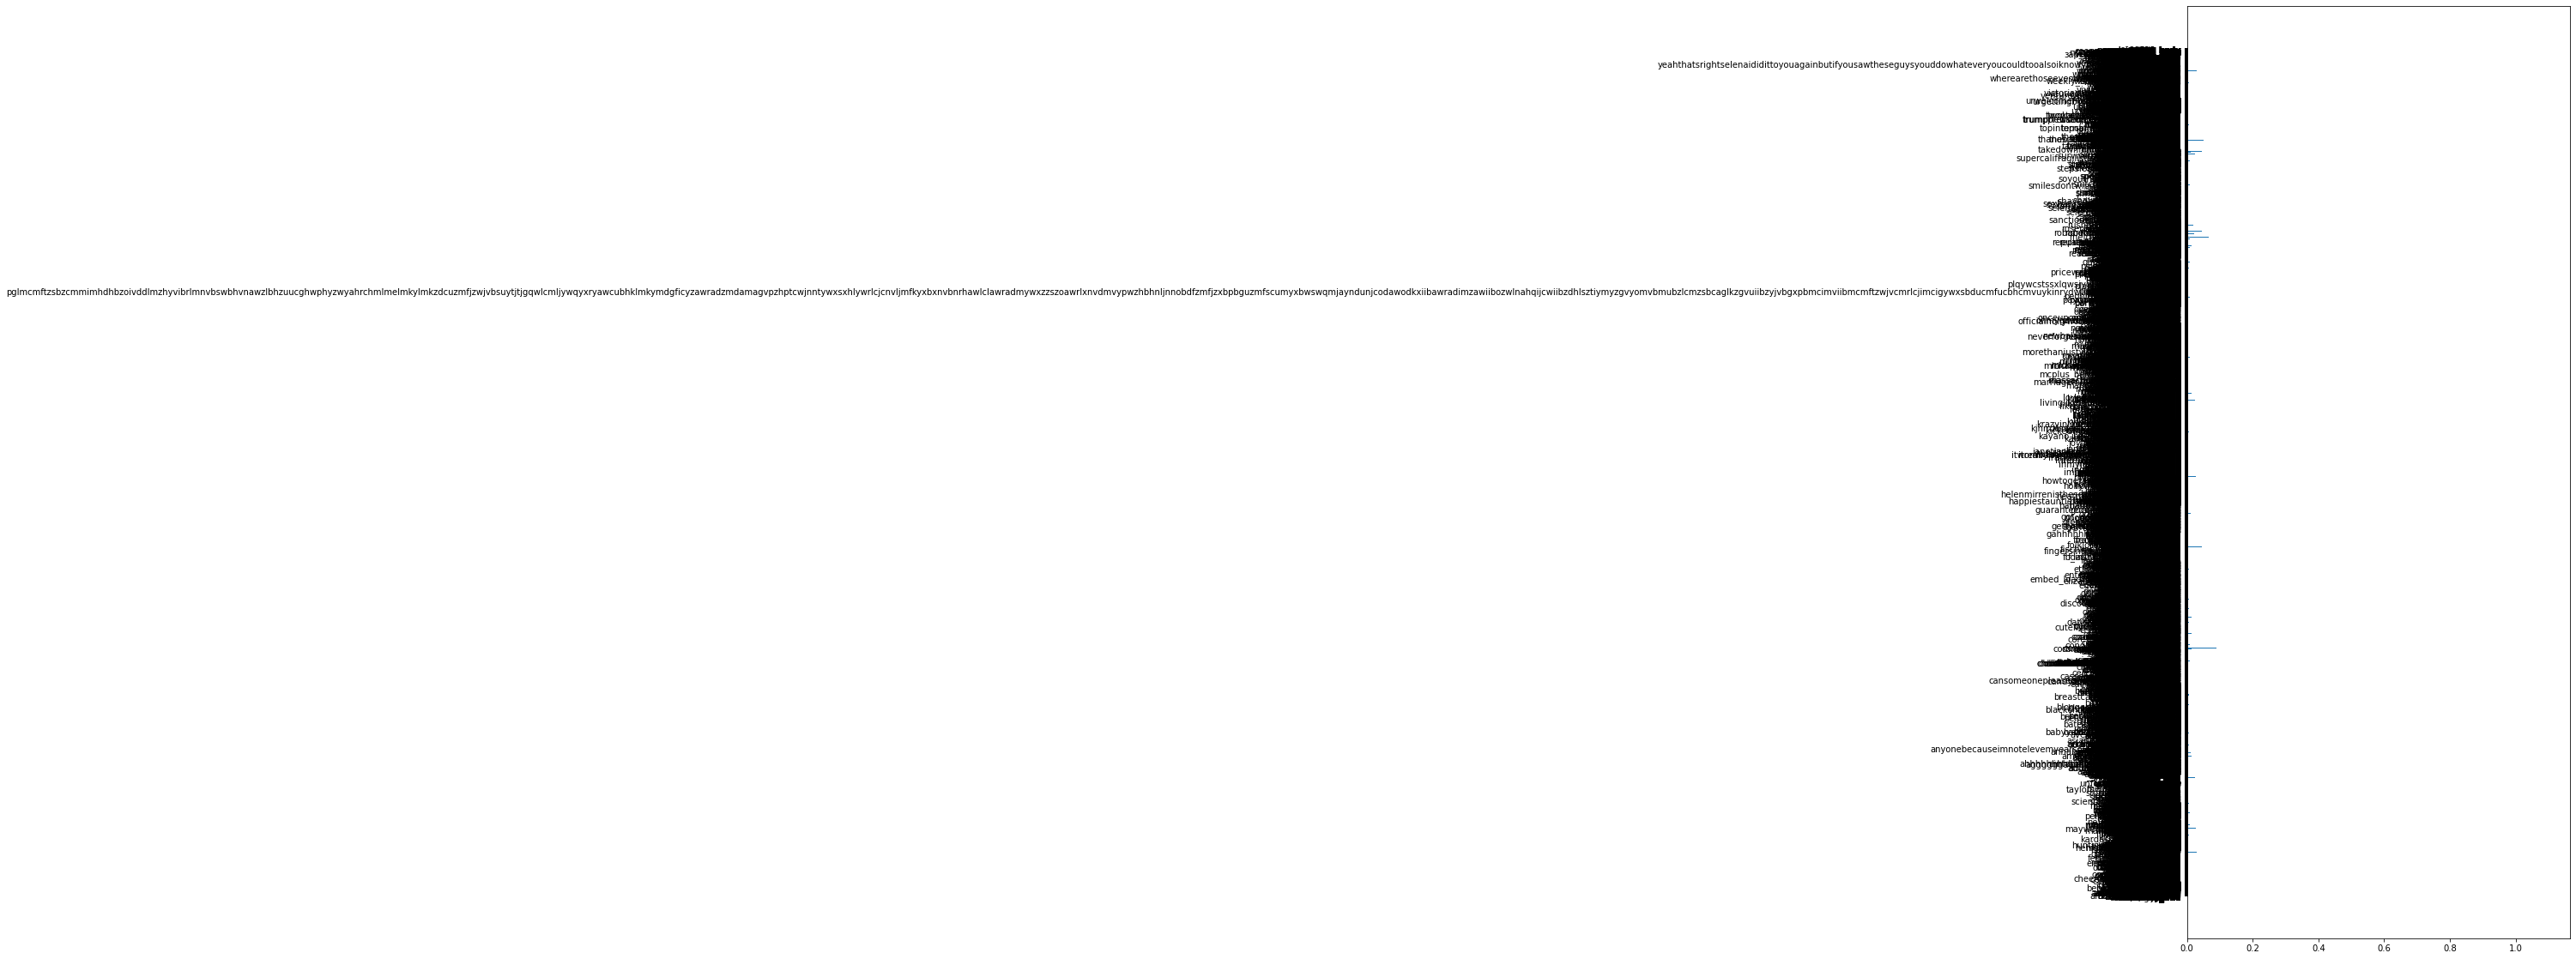

In [ ]:
# most important features

pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*rf.feature_importances_}).round(1)
              
              
plt.figure(figsize=(8,20))
plt.barh(X_train.columns, 100*rf.feature_importances_)
plt.show()

#### Boosting

##### Boosting Cross validation

In [ ]:
# With Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'max_leaf_nodes': np.linspace(7, 20, 7, dtype='int32'),
               'min_samples_leaf': [10],
               'n_estimators': [500],
               'learning_rate': [0.01],
               'random_state': [88]}

gbr = GradientBoostingClassifier()
gbr_cv = GridSearchCV(gbr, param_grid=grid_values, scoring='f1', cv=5)
gbr_cv.fit(X_val, y_val)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01],
                         'max_leaf_nodes': array([ 7,  9, 11, 13, 15, 17, 20], dtype=int32),
                         'min_samples_leaf': [10], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='f1')

In [ ]:
print('Grid best parameter max_leaf_nodes (max. CV f1 score): ', gbr_cv.best_params_['max_leaf_nodes'])
print('Grid best score (CV f1 score): ', gbr_cv.best_score_)

Grid best parameter max_leaf_nodes (max. CV f1 score):  9
Grid best score (CV f1 score):  0.5438802817239605


##### Boosting - hyper parameters tuning on validation set

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Boosting Regressor

gbr = GradientBoostingClassifier(n_estimators=500, learning_rate= 0.001, random_state=88, verbose=1, max_leaf_nodes=9) 
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1969            3.73m
         2           1.1965            3.64m
         3           1.1961            3.58m
         4           1.1957            3.60m
         5           1.1952            3.58m
         6           1.1948            3.56m
         7           1.1944            3.54m
         8           1.1940            3.51m
         9           1.1936            3.51m
        10           1.1932            3.48m
        20           1.1891            3.40m
        30           1.1851            3.34m
        40           1.1812            3.28m
        50           1.1775            3.20m
        60           1.1738            3.13m
        70           1.1703            3.06m
        80           1.1668            2.99m
        90           1.1634            2.91m
       100           1.1601            2.83m
       200           1.1310            2.11m
       300           1.1069            1.41m
       40

GradientBoostingClassifier(learning_rate=0.001, max_leaf_nodes=9,
                           n_estimators=500, random_state=88, verbose=1)

In [ ]:
cm_gbr = confusion_matrix(y_test, gbr.predict(X_test)).ravel()

acc_gbc = acc(cm_gbr)
tpr_gbc = tpr(cm_gbr)
fpr_gbc = fpr(cm_gbr)
f1_gbc = f1(cm_gbr)

print('Accuracy gbc :', acc_gbc)
print('TPR gbc model :', tpr_gbc, '\nFPR gbc model :', fpr_gbc)
print('F1 score gbc model :', f1_gbc)

Accuracy gbc : 0.765
TPR gbc model : 0.21 
FPR gbc model : 0.014
F1 score gbc model : 0.337


# Second Part: Merging of TF-IDF and FastText

# Load in the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary packages 

## General librariesimport pandas as pd
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
import datetime
import time
import seaborn as sns

## Machine Learning libraries
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from xgboost import XGBClassifier
from datetime import datetime
import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from tqdm import tqdm

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_test.csv")
df_val = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_val.csv")

In [ ]:
# function for performance metrics with confusion matrix as argument

def acc(cm):
  return(round((cm[3]+ cm[0])/(cm[2]+cm[3]+cm[1]+cm[0]),3))

def tpr(cm):
  return(round(cm[3]/(cm[2]+cm[3]),3))

def fpr(cm):
  return(round(cm[1]/(cm[0]+cm[1]),3))

def f1(cm):
  return(round(2*cm[3]/(2*cm[3]+cm[2]+cm[1]),3))

# TF-IDF

## Pre-processing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Import packages and modules
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer# Create a dataframe
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit

In [ ]:
def remove_punctuation(document):
    new_string = ''.join([char for char in document if char.isalnum() or char == ' '])
    return new_string

### Title

In [ ]:
def preprocess_title(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords

**Train**

In [ ]:
# Create an instance of TfidfVectorizer
vectoriser_title = TfidfVectorizer(analyzer=preprocess_title)

# Fit to the data and transform to feature matrix
df_title_train = df_train['title']
df_title_train = df_title_train.apply(remove_digit)
df_title_train = df_title_train.apply(remove_punctuation)
title_train = vectoriser_title.fit_transform(df_title_train)

# Convert sparse matrix to dataframe
title_train = pd.DataFrame.sparse.from_spmatrix(title_train)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_title.vocabulary_.items()}

# Rename each column using the mapping
for col in title_train.columns:
    title_train.rename(columns={col: col_map[col]}, inplace=True)
title_train

,aap,aaron,ab,abandon,abba,abbey,abbott,abby,abbys,abc,...,zolciak,zolciakbiermann,zombie,zone,zoo,zooey,zooeys,zoë,zsa,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
l = [ x + '_title' for x in title_train.columns]
title_train.columns = l

**Test**

In [ ]:
# Fit to the data and transform to feature matrix
df_title_test = df_test['title']
df_title_test = df_title_test.apply(remove_digit)
df_title_test = df_title_test.apply(remove_punctuation)
title_test = vectoriser_title.transform(df_title_test)

# Convert sparse matrix to dataframe
title_test = pd.DataFrame.sparse.from_spmatrix(title_test)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_title.vocabulary_.items()}

# Rename each column using the mapping
for col in title_test.columns:
    title_test.rename(columns={col: col_map[col]}, inplace=True)
title_test

,aap,aaron,ab,abandon,abba,abbey,abbott,abby,abbys,abc,...,zolciak,zolciakbiermann,zombie,zone,zoo,zooey,zooeys,zoë,zsa,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
l = [ x + '_title' for x in title_test.columns]
title_test.columns = l

**Validation**

In [ ]:
# Fit to the data and transform to feature matrix
df_title_val = df_val['title']
df_title_val = df_title_val.apply(remove_digit)
df_title_val = df_title_val.apply(remove_punctuation)
title_val = vectoriser_title.transform(df_title_val)

# Convert sparse matrix to dataframe
title_val = pd.DataFrame.sparse.from_spmatrix(title_val)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_title.vocabulary_.items()}

# Rename each column using the mapping
for col in title_val.columns:
    title_val.rename(columns={col: col_map[col]}, inplace=True)
title_val

,aap,aaron,ab,abandon,abba,abbey,abbott,abby,abbys,abc,...,zolciak,zolciakbiermann,zombie,zone,zoo,zooey,zooeys,zoë,zsa,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
l = [ x + '_title' for x in title_val.columns]
title_val.columns = l

### Body

In [ ]:
def preprocess_body(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stopwords.words('english')]
    return keywords

**Train**

In [ ]:
# Create an instance of TfidfVectorizer
vectoriser_body = TfidfVectorizer(analyzer=preprocess_body)

# Fit to the data and transform to feature matrix
df_body_train = df_train['body']
df_body_train = df_body_train.apply(remove_digit)
body_train = vectoriser_body.fit_transform(df_body_train)

# Convert sparse matrix to dataframe
body_train = pd.DataFrame.sparse.from_spmatrix(body_train)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_body.vocabulary_.items()}

# Rename each column using the mapping
from tqdm import tqdm
for col in tqdm(body_train.columns):
    body_train.rename(columns={col: col_map[col]}, inplace=True)
body_train

100%|██████████| 52551/52551 [26:56<00:00, 32.51it/s]


,_,__,___,________,__linagarcia,__what,_actress,_amygray_,_beenwavey,_brianadejesus,...,яндекс,ツ,진주,ﬁnd,ﬁnds,𝐟𝐚𝐭𝐭𝐚,𝐩𝐞𝐫𝐫𝐲,𝐩𝐮𝐬𝐬,𝐭𝐡𝐞,𝓲𝓽𝔃𝓮𝓵
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
l = [ x + '_body' for x in body_train.columns]
body_train.columns = l

In [ ]:
#We only take the non numerical columns
df_train_2 = pd.concat([df_train['index'], df_train['fake_news'], title_train, body_train], axis = 1)

In [ ]:
df_train_2

,index,fake_news,aap_title,aaron_title,ab_title,abandon_title,abba_title,abbey_title,abbott_title,abby_title,...,яндекс_body,ツ_body,진주_body,ﬁnd_body,ﬁnds_body,𝐟𝐚𝐭𝐭𝐚_body,𝐩𝐞𝐫𝐫𝐲_body,𝐩𝐮𝐬𝐬_body,𝐭𝐡𝐞_body,𝓲𝓽𝔃𝓮𝓵_body
0,g_881134,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,g_866473,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,g_914920,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,g_858761,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,g_876437,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,g_2343299673,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6695,g_893171,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6696,g_567879122,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6697,g_884684,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Test**

In [ ]:
# Fit to the data and transform to feature matrix
df_body_test = df_test['body']
df_body_test = df_body_test.apply(remove_digit)
body_test = vectoriser_body.transform(df_body_test)

# Convert sparse matrix to dataframe
body_test = pd.DataFrame.sparse.from_spmatrix(body_test)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_body.vocabulary_.items()}

# Rename each column using the mapping
from tqdm import tqdm
for col in tqdm(body_test.columns):
    body_test.rename(columns={col: col_map[col]}, inplace=True)
body_test

100%|██████████| 52551/52551 [24:15<00:00, 36.10it/s]


,_,__,___,________,__linagarcia,__what,_actress,_amygray_,_beenwavey,_brianadejesus,...,яндекс,ツ,진주,ﬁnd,ﬁnds,𝐟𝐚𝐭𝐭𝐚,𝐩𝐞𝐫𝐫𝐲,𝐩𝐮𝐬𝐬,𝐭𝐡𝐞,𝓲𝓽𝔃𝓮𝓵
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
l = [ x + '_body' for x in body_test.columns]
body_test.columns = l

In [ ]:
df_test_2 = pd.concat([df_test['index'], df_test['fake_news'], title_test, body_test], axis = 1)

**Validation**

In [ ]:
# Fit to the data and transform to feature matrix
df_body_val = df_val['body']
df_body_val = df_body_val.apply(remove_digit)
df_body_val = df_body_val.apply(remove_punctuation)
body_val = vectoriser_body.transform(df_body_val)

# Convert sparse matrix to dataframe
body_val = pd.DataFrame.sparse.from_spmatrix(body_val)

# Save mapping on which index refers to which words
col_map = {v:k for k, v in vectoriser_body.vocabulary_.items()}

# Rename each column using the mapping
from tqdm import tqdm
for col in tqdm(body_val.columns):
    body_val.rename(columns={col: col_map[col]}, inplace=True)
body_val

In [ ]:
l = [ x + '_body' for x in body_val.columns]
body_val.columns = l

In [ ]:
df_val_2 = pd.concat([df_val['index'], df_val['fake_news'], title_val, body_val], axis = 1)

## Predictive Models - Only Text

In [ ]:
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from xgboost import XGBClassifier
from datetime import datetime
import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
df_val_2

In [ ]:
df_train_2 = df_train_2.set_index('index')
df_test_2 = df_test_2.set_index('index')
df_val_2 = df_val_2.set_index('index')

X_train = df_train_2.drop(columns=['fake_news'])
X_test = df_test_2.drop(columns=['fake_news'])
X_val = df_val_2.drop(columns=['fake_news'])

y_train = df_train_2['fake_news']
y_test = df_test_2['fake_news']
y_val = df_val_2['fake_news']

In [ ]:
def acc(cm):
  return(round((cm[3]+ cm[0])/(cm[2]+cm[3]+cm[1]+cm[0]),3))

def tpr(cm):
  return(round(cm[3]/(cm[2]+cm[3]),3))

def fpr(cm):
  return(round(cm[1]/(cm[0]+cm[1]),3))

def f1(cm):
  return(round(2*cm[3]/(2*cm[3]+cm[2]+cm[1]),3))

### Baseline

In [ ]:
y_train.value_counts()

0    4782
1    1917
Name: fake_news, dtype: int64

In [ ]:
y_test.value_counts()

0    1837
1     730
Name: fake_news, dtype: int64

In [ ]:
acc_baseline = y_test.value_counts()[0] / (y_test.value_counts()[0] + y_test.value_counts()[1])
tpr_baseline = 0
fpr_baseline = 0
f1_baseline = 0

print('Accuracy baseline model :', acc_baseline)
print('TPR baseline model :', tpr_baseline, '\nFPR baseline model :', fpr_baseline)
print('F1 score baseline model :', f1_baseline)

Accuracy baseline model : 0.7156213478768991
TPR baseline model : 0 
FPR baseline model : 0
F1 score baseline model : 0


### Logistic Regression

In [52]:
logreg = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


LogisticRegression(solver='liblinear')

In [53]:
y_pred_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test,y_pred_logreg).ravel()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [54]:
acc_logreg = acc(cm_logreg)
tpr_logreg = tpr(cm_logreg)
fpr_logreg = fpr(cm_logreg)
f1_logreg = f1(cm_logreg)

print('Accuracy logreg model :', acc_logreg)
print('TPR logreg model :', tpr_logreg, '\nFPR logreg model :', fpr_logreg)
print('F1 score logreg model :', f1_logreg)

Accuracy logreg model : 0.838
TPR logreg model : 0.558 
FPR logreg model : 0.051
F1 score logreg model : 0.662


In [55]:
y_pred_tfidf_test = y_pred_logreg

In [ ]:
y_pred_tfidf_test.to_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/y_pred_tfidf_test.csv")

In [56]:
y_pred_tfidf_train = logreg.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [ ]:
y_pred_tfidf_train.to_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/y_pred_tfidf_train.csv")

AttributeError: ignored

In [57]:
y_pred_tfidf_val = logreg.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [ ]:
y_pred_tfidf_val.to_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/y_pred_tfidf_val.csv")

AttributeError: ignored

# Fasttext

In [58]:
pip install fasttext

     |████████████████████████████████| 68 kB 3.1 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3148729 sha256=693b5ecb8706aae0fc1eb84ef6798dc6cbc853e499a90dde1356e356317a8813
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [59]:
import os
from fasttext import train_supervised

In [60]:
df_train = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_train.csv").set_index('index')
df_test = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_test.csv").set_index('index')
df_val = pd.read_csv("/content/drive/MyDrive/243/FakeNewsNet/dataset/clean_merged_data_val.csv").set_index('index')

In [61]:
y_train = df_train['fake_news']
y_val = df_val['fake_news']
y_test = df_test['fake_news']

In [62]:
df_test.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'title', 'publish_date', 'body', 'tweet_ids', 'fake_news',
       'tweets_count', 'Retweet', 'Like', 'Reply', 'Hour', 'Weekday', 'Month',
       'source_url_billboard', 'source_url_dailymail', 'source_url_elle',
       'source_url_ew', 'source_url_hollywoodreporter', 'source_url_other',
       'source_url_radaronline', 'source_url_today', 'source_url_usatoday',
       'source_url_usmagazine', 'source_url_variety'],
      dtype='object')

In [63]:
y_train = df_train['fake_news']
y_val = df_val['fake_news']
y_test = df_test['fake_news']

In [64]:
# function for performance metrics with confusion matrix as argument

def acc(cm):
  return(round((cm[3]+ cm[0])/(cm[2]+cm[3]+cm[1]+cm[0]),3))

def tpr(cm):
  return(round(cm[3]/(cm[2]+cm[3]),3))

def fpr(cm):
  return(round(cm[1]/(cm[0]+cm[1]),3))

def f1(cm):
  return(round(2*cm[3]/(2*cm[3]+cm[2]+cm[1]),3))

### Body

In [65]:
# only keeping the body of the articles and the labels

df_train_body = df_train[['body','fake_news']]
df_test_body = df_test[['body','fake_news']]
df_val_body = df_val[['body','fake_news']]

##### Train

In [66]:
# text pre-processing

import os

text = df_train_body['body']

# change to lowercase
text_lowercase = text.str.lower()

# remove punctuation
from string import punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct
text_no_punct = text_lowercase.apply(remove_punctuation)

# remove digits
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit
text_no_digit = text_no_punct.apply(remove_digit)

# tokenization (split words)
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text_tokenized = text_no_digit.apply(word_tokenize)

# remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words
stop_words = set(stopwords.words('english'))
stop_words.add('XX')
text_no_stop = text_tokenized.apply(remove_stopwords)

# stemming (remove end of words)
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document
text_stemmed = text_no_stop.apply(stemmer)

# detokenization (merge words)
from nltk.tokenize.treebank import TreebankWordDetokenizer
text_detokenized_body_train = text_stemmed.apply(TreebankWordDetokenizer().detokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
text_detokenized_body_train

index
g_881134        kate middleton want kid know ok talk mental he...
g_866473        maev mcdermott usa today woodi allen clarinet ...
g_914920        cast vanderpump rule choic word costar jame ke...
g_858761        jon hamm definit fan social media made clear i...
g_876437        fan shock former bachelor nick viall announc f...
                                      ...                        
g_2343299673    brad pitt see kid regularli accord new report ...
g_893171        confirm romanc earlier month cosi sight britis...
g_567879122     sure long round rihanna drake last two star ch...
g_884684        celin dion pledg proce show colosseum caesar p...
g_875085        live room bodi coffe tabl would heart ’ gather...
Name: body, Length: 6699, dtype: object

In [68]:
# exact format for the supervised fastText model: using __label__ + class + text

df_train_body_post = pd.concat([pd.DataFrame(text_detokenized_body_train),df_train_body['fake_news']], axis = 1)
df_train_body_post['fake_news'] = df_train_body_post['fake_news'].astype(str)

In [69]:
df_train_labeled_body =  '__label__' + df_train_body_post['fake_news'] + ' ' + df_train_body_post['body']
print(df_train_labeled_body)

index
g_881134        __label__0 kate middleton want kid know ok tal...
g_866473        __label__0 maev mcdermott usa today woodi alle...
g_914920        __label__0 cast vanderpump rule choic word cos...
g_858761        __label__0 jon hamm definit fan social media m...
g_876437        __label__0 fan shock former bachelor nick vial...
                                      ...                        
g_2343299673    __label__1 brad pitt see kid regularli accord ...
g_893171        __label__0 confirm romanc earlier month cosi s...
g_567879122     __label__1 sure long round rihanna drake last ...
g_884684        __label__0 celin dion pledg proce show colosse...
g_875085        __label__0 live room bodi coffe tabl would hea...
Length: 6699, dtype: object


##### Test

In [70]:
# text pre-processing

import os

text = df_test_body['body']

# change to lowercase
text_lowercase = text.str.lower()

# remove punctuation
from string import punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct
text_no_punct = text_lowercase.apply(remove_punctuation)

# remove digits
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit
text_no_digit = text_no_punct.apply(remove_digit)

# tokenization (split words)
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text_tokenized = text_no_digit.apply(word_tokenize)

# remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words
stop_words = set(stopwords.words('english'))
stop_words.add('XX')
text_no_stop = text_tokenized.apply(remove_stopwords)

# stemming (remove end of words)
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document
text_stemmed = text_no_stop.apply(stemmer)

# detokenization (merge words)
from nltk.tokenize.treebank import TreebankWordDetokenizer
text_detokenized_body_test = text_stemmed.apply(TreebankWordDetokenizer().detokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
# exact format for the supervised fastText model: using __label__ + class + text
df_test_body_post = pd.concat([pd.DataFrame(text_detokenized_body_test),df_test_body['fake_news']], axis = 1)
df_test_body_post['fake_news'] = df_test_body_post['fake_news'].astype(str)

In [72]:
df_test_labeled_body = df_test_body_post['body']
print(df_test_labeled_body)

index
g_886352    click email friend open new window click share...
g_887153    jaleesa jone special usa today initi sidestep ...
g_851818    canada ’ ‘ freedom convoy ’ trucker whose prot...
g_920809    celebr treat signific other like trash love is...
g_901375    air forc veteran grant die wish see last jedi ...
                                  ...                        
g_900480    look sweet cooki recip latest fashion trend in...
g_900844    perhap anyon els royal famili charlott close r...
g_908022    sinc mycalvin campaign kick last year seen rol...
g_910399    usa today mark sall former glee star plead gui...
g_909782    mani biggest name music miss sunday grammi awa...
Name: body, Length: 2567, dtype: object


##### Validation

In [73]:
# text pre-processing
import os

text = df_val_body['body']

# change to lowercase
text_lowercase = text.str.lower()

# remove punctuation
from string import punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct
text_no_punct = text_lowercase.apply(remove_punctuation)

# remove digits
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit
text_no_digit = text_no_punct.apply(remove_digit)

# tokenization (split words)
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text_tokenized = text_no_digit.apply(word_tokenize)

# remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words
stop_words = set(stopwords.words('english'))
stop_words.add('XX')
text_no_stop = text_tokenized.apply(remove_stopwords)

# stemming (remove end of words)
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document
text_stemmed = text_no_stop.apply(stemmer)

# detokenization (merge words)
from nltk.tokenize.treebank import TreebankWordDetokenizer
text_detokenized_body_val = text_stemmed.apply(TreebankWordDetokenizer().detokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
# exact format for the supervised fastText model: using __label__ + class + text

df_val_body_post = pd.concat([pd.DataFrame(text_detokenized_body_val),df_val_body['fake_news']], axis = 1)
df_val_body_post['fake_news'] = df_val_body_post['fake_news'].astype(str)

In [75]:
df_val_labeled_body = df_val_body_post['body']
print(df_val_labeled_body)

index
p_379           rightli big issu ohio laid critic addit plan a...
g_895866        miley cyru still glad love one lean cant stop ...
g_9109637963    angelina joli file divorc brad pitt twitter fo...
g_857297        us cast came togeth spread fake spoiler season...
g_930760        audrina patridg singer ryan cabrera split back...
                                      ...                        
g_870947        morn aesthetician founder skincar line taught ...
g_891755        spoiler alert read yet watch “ first wife ” ei...
g_908995        mdlla agent give us glimps nuptial like never ...
g_3800163388    wow lot celebr news break sunday night sure ju...
g_844273        author investig caus princ ’ death thursday en...
Name: body, Length: 1002, dtype: object


### Models - body

In [76]:
#write test and train into txt files

f_train_body = open("fasttext_train_body.txt", "a")
for i in range(len(np.array(df_train_labeled_body))):
    f_train_body.write(np.array(df_train_labeled_body)[i] + "\n")
f_train_body.close()

f_test_body = open("fasttext_test_body.txt", "a")
for i in range(len(np.array(df_test_labeled_body))):
    f_test_body.write(np.array(df_test_labeled_body)[i] + "\n")
f_test_body.close()

f_val_body = open("fasttext_val_body.txt", "a")
for i in range(len(np.array(df_val_labeled_body))):
    f_val_body.write(np.array(df_val_labeled_body)[i] + "\n")
f_val_body.close()

In [77]:
# training the model with train_supervised

fasttext_body = train_supervised(input="fasttext_train_body.txt", loss = "ns", wordNgrams=1)

In [78]:
print(fasttext_body.test("fasttext_test_body.txt")) #(n, precision, recall)

(0, nan, nan)


In [79]:
# predicting the testing set row by row

y_pred_fasttext_body = df_test_labeled_body.apply(lambda x: int(fasttext_body.predict(x)[0][0][-1]))

In [80]:
# assessing the performance of the model

cm_fasttext_body = confusion_matrix(y_test, y_pred_fasttext_body).ravel()

acc_fasttext_body = acc(cm_fasttext_body)
tpr_fasttext_body = tpr(cm_fasttext_body)
fpr_fasttext_body = fpr(cm_fasttext_body)
f1_fasttext_body = f1(cm_fasttext_body)

print('Accuracy fasttext_body :', acc_fasttext_body)
print('TPR fasttext_body model :', tpr_fasttext_body, '\nFPR fasttext_body model :', fpr_fasttext_body)
print('F1 score fasttext_body model :', f1_fasttext_body)

Accuracy fasttext_body : 0.824
TPR fasttext_body model : 0.564 
FPR fasttext_body model : 0.073
F1 score fasttext_body model : 0.646


### Title

In [81]:
df_train_title = df_train[['title','fake_news']]
df_test_title = df_test[['title','fake_news']]
df_val_title = df_val[['title','fake_news']]

##### Train

In [82]:
# text pre-processing

import os

text = df_train_title['title']

# change to lowercase
text_lowercase = text.str.lower()

# remove punctuation
from string import punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct
text_no_punct = text_lowercase.apply(remove_punctuation)

# remove digits
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit
text_no_digit = text_no_punct.apply(remove_digit)

# tokenization (split words)
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text_tokenized = text_no_digit.apply(word_tokenize)

# remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words
stop_words = set(stopwords.words('english'))
stop_words.add('XX')
text_no_stop = text_tokenized.apply(remove_stopwords)

# stemming (remove end of words)
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document
text_stemmed = text_no_stop.apply(stemmer)

# detokenization (merge words)
from nltk.tokenize.treebank import TreebankWordDetokenizer
text_detokenized_title_train = text_stemmed.apply(TreebankWordDetokenizer().detokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
text_detokenized_title_train

index
g_881134        kate middleton introduc mental health film pay...
g_866473        topless activist crash woodi allen concert ger...
g_914920        jax taylor brittani cartwright lala kent slam ...
g_858761        jon hamm slam social media visual equival masturb
g_876437        bachelor star nick viall vanessa grimaldi spea...
                                      ...                        
g_2343299673    brad pitt see kid sever time week — insid priv...
g_893171        brooklyn beckham new model girlfriend hana cro...
g_567879122         reason rihanna drake could next beyoncé jay z
g_884684         celin dion donat concert proce vega shoot victim
g_875085            pretti celebr book would look good coffe tabl
Name: title, Length: 6699, dtype: object

In [84]:
# exact format for the supervised fastText model: using __label__ + class + text

df_train_title_post = pd.concat([pd.DataFrame(text_detokenized_title_train),df_train_title['fake_news']], axis = 1)
df_train_title_post['fake_news'] = df_train_title_post['fake_news'].astype(str)

In [85]:
df_train_labeled_title =  '__label__' + df_train_title_post['fake_news'] + ' ' + df_train_title_post['title']
print(df_train_labeled_title)

index
g_881134        __label__0 kate middleton introduc mental heal...
g_866473        __label__0 topless activist crash woodi allen ...
g_914920        __label__0 jax taylor brittani cartwright lala...
g_858761        __label__0 jon hamm slam social media visual e...
g_876437        __label__0 bachelor star nick viall vanessa gr...
                                      ...                        
g_2343299673    __label__1 brad pitt see kid sever time week —...
g_893171        __label__0 brooklyn beckham new model girlfrie...
g_567879122     __label__1 reason rihanna drake could next bey...
g_884684        __label__0 celin dion donat concert proce vega...
g_875085        __label__0 pretti celebr book would look good ...
Length: 6699, dtype: object


##### Test

In [86]:
# text pre-processing

import os

text = df_test_title['title']

# change to lowercase
text_lowercase = text.str.lower()

# remove punctuation
from string import punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct
text_no_punct = text_lowercase.apply(remove_punctuation)

# remove digits
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit
text_no_digit = text_no_punct.apply(remove_digit)

# tokenization (split words)
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text_tokenized = text_no_digit.apply(word_tokenize)

# remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words
stop_words = set(stopwords.words('english'))
stop_words.add('XX')
text_no_stop = text_tokenized.apply(remove_stopwords)

# stemming (remove end of words)
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document
text_stemmed = text_no_stop.apply(stemmer)

# detokenization (merge words)
from nltk.tokenize.treebank import TreebankWordDetokenizer
text_detokenized_title_test = text_stemmed.apply(TreebankWordDetokenizer().detokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
# exact format for the supervised fastText model: using __label__ + class + text

df_test_title_post = pd.concat([pd.DataFrame(text_detokenized_title_test),df_test_title['fake_news']], axis = 1)
df_test_title_post['fake_news'] = df_test_title_post['fake_news'].astype(str)

In [88]:
df_test_labeled_title = df_test_title_post['title']
print(df_test_labeled_title)

index
g_886352                makeup artist accus ben affleck grope
g_887153    saturday night live final tackl harvey weinste...
g_851818    famili say jetblu kick flight argument birthda...
g_920809               celebr treat signific other like trash
g_901375        air forc veteran grant die wish see last jedi
                                  ...                        
g_900480       eminem sell “ mom ’ spaghetti ” new popup shop
g_900844           time princess charlott look like royal rel
g_908022    calvin klein cast kardashian jenner sister new...
g_910399    glee actor mark sall plead guilti child porn f...
g_909782       taylor swift ed sheeran drake skip year grammi
Name: title, Length: 2567, dtype: object


##### Validation

In [89]:
# text pre-processing

import os

text = df_val_title['title']

# change to lowercase
text_lowercase = text.str.lower()

# remove punctuation
from string import punctuation
def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct
text_no_punct = text_lowercase.apply(remove_punctuation)

# remove digits
def remove_digit(document): 
    no_digit = ''.join([character for character in document if not character.isdigit()])    
    return no_digit
text_no_digit = text_no_punct.apply(remove_digit)

# tokenization (split words)
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
text_tokenized = text_no_digit.apply(word_tokenize)

# remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words
stop_words = set(stopwords.words('english'))
stop_words.add('XX')
text_no_stop = text_tokenized.apply(remove_stopwords)

# stemming (remove end of words)
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document
text_stemmed = text_no_stop.apply(stemmer)

# detokenization (merge words)
from nltk.tokenize.treebank import TreebankWordDetokenizer
text_detokenized_title_val = text_stemmed.apply(TreebankWordDetokenizer().detokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
# exact format for the supervised fastText model: using __label__ + class + text

df_val_title_post = pd.concat([pd.DataFrame(text_detokenized_title_val),df_val_title['fake_news']], axis = 1)
df_val_title_post['fake_news'] = df_val_title_post['fake_news'].astype(str)

In [91]:
df_val_labeled_title = df_val_title_post['title']
print(df_val_labeled_title)

index
p_379                                    democrat debat cleveland
g_895866        miley cyru celebr th birthday famili lose home...
g_9109637963    brad pitt jennif aniston rekindl romanc despit...
g_857297        us cast share hope fake spoiler season red nos...
g_930760        audrina patridg ryan cabrera attend stagecoach...
                                      ...                        
g_870947                   top aesthetician reveal skincar routin
g_891755        ‘ outland ’ recap clair releg ‘ first wife ’ s...
g_908995        josh flagg share futur wed vow bobbi boyd four...
g_3800163388    fan think kyli jenner look like old kyli remov...
g_844273              hollywood pay tribut legendari artist princ
Name: title, Length: 1002, dtype: object


### Models - title

In [92]:
#write test and train into txt files

f_train_title = open("fasttext_train_title.txt", "a")
for i in range(len(np.array(df_train_labeled_title))):
    f_train_title.write(np.array(df_train_labeled_title)[i] + "\n")
f_train_title.close()

f_test_title = open("fasttext_test_title.txt", "a")
for i in range(len(np.array(df_test_labeled_title))):
    f_test_title.write(np.array(df_test_labeled_title)[i] + "\n")
f_test_title.close()

f_val_title = open("fasttext_val_title.txt", "a")
for i in range(len(np.array(df_val_labeled_title))):
    f_val_title.write(np.array(df_val_labeled_title)[i] + "\n")
f_val_title.close()

In [93]:
# # training the model with train_supervised

fasttext_title = train_supervised(input="fasttext_train_title.txt", loss = "ns", wordNgrams=1)

In [94]:
# predicting the testing set row by row

y_pred_fasttext_title = df_test_labeled_title.apply(lambda x: int(fasttext_title.predict(x)[0][0][-1]))

In [95]:
# assessing the performance of the model

cm_fasttext_title = confusion_matrix(y_test, y_pred_fasttext_title).ravel()

acc_fasttext_title = acc(cm_fasttext_title)
tpr_fasttext_title = tpr(cm_fasttext_title)
fpr_fasttext_title = fpr(cm_fasttext_title)
f1_fasttext_title = f1(cm_fasttext_title)

print('Accuracy fasttext_title :', acc_fasttext_title)
print('TPR fasttext_title model :', tpr_fasttext_title, '\nFPR fasttext_title model :', fpr_fasttext_title)
print('F1 score fasttext_title model :', f1_fasttext_title)

Accuracy fasttext_title : 0.802
TPR fasttext_title model : 0.586 
FPR fasttext_title model : 0.112
F1 score fasttext_title model : 0.628


# Combination

In [96]:
cols = ['tweets_count', 'Retweet', 'Like', 'Reply', 'Hour', 'Weekday', 'Month',
       'source_url_billboard', 'source_url_dailymail', 'source_url_elle',
       'source_url_ew', 'source_url_hollywoodreporter', 'source_url_other',
       'source_url_radaronline', 'source_url_today', 'source_url_usatoday',
       'source_url_usmagazine', 'source_url_variety']

X_train_combine = df_train.copy()[cols]
X_val_combine = df_val.copy()[cols]
X_test_combine = df_test.copy()[cols]

y_pred_train_fasttext_body = df_train_labeled_body.apply(lambda x: int(fasttext_body.predict(x)[0][0][-1]))
y_pred_train_fasttext_title = df_train_labeled_title.apply(lambda x: int(fasttext_title.predict(x)[0][0][-1]))

y_pred_val_fasttext_body = df_val_labeled_body.apply(lambda x: int(fasttext_body.predict(x)[0][0][-1]))
y_pred_val_fasttext_title = df_val_labeled_title.apply(lambda x: int(fasttext_title.predict(x)[0][0][-1]))

y_pred_test_fasttext_body = df_test_labeled_body.apply(lambda x: int(fasttext_body.predict(x)[0][0][-1]))
y_pred_test_fasttext_title = df_test_labeled_title.apply(lambda x: int(fasttext_title.predict(x)[0][0][-1]))


In [97]:
y_pred_train_fasttext_body

index
g_881134        0
g_866473        0
g_914920        0
g_858761        0
g_876437        0
               ..
g_2343299673    1
g_893171        0
g_567879122     1
g_884684        0
g_875085        0
Length: 6699, dtype: int64

In [98]:
y_pred_tfidf_train

array([0, 0, 0, ..., 1, 0, 0])

In [99]:
df_y_pred_tfidf_train = pd.DataFrame(y_pred_tfidf_train, columns = ['tfidf'], index = y_pred_train_fasttext_body.index)
X_train_merge = pd.concat([y_pred_train_fasttext_body, y_pred_train_fasttext_title, df_y_pred_tfidf_train], axis = 1)
X_train_merge

,0,1,tfidf
index,,,
g_881134,0,0,0
g_866473,0,0,0
g_914920,0,0,0
g_858761,0,0,0
g_876437,0,0,0
...,...,...,...
g_2343299673,1,1,1
g_893171,0,0,0
g_567879122,1,1,1


In [100]:
X_train_merge = X_train_merge.rename(columns={0:'fasttext_body', 1:'fasttext_title','tfidf':'tfidf'})

In [101]:
df_y_pred_tfidf_test = pd.DataFrame(y_pred_tfidf_test, columns = ['tfidf'], index = y_pred_test_fasttext_body.index)
X_test_merge = pd.concat([y_pred_test_fasttext_body, y_pred_test_fasttext_title, df_y_pred_tfidf_test], axis = 1)
X_test_merge = X_test_merge.rename(columns={'body':'fasttext_body', 'title':'fasttext_title','tfidf':'tfidf'})

In [102]:
X_test_merge

,fasttext_body,fasttext_title,tfidf
index,,,
g_886352,0,0,0
g_887153,0,0,0
g_851818,1,0,0
g_920809,1,0,1
g_901375,0,0,0
...,...,...,...
g_900480,0,0,0
g_900844,1,0,0
g_908022,0,0,0


In [103]:
df_y_pred_tfidf_val = pd.DataFrame(y_pred_tfidf_val, columns = ['tfidf'], index = y_pred_val_fasttext_body.index)
X_val_merge = pd.concat([y_pred_val_fasttext_body, y_pred_val_fasttext_title, df_y_pred_tfidf_val], axis = 1)
X_val_merge = X_val_merge.rename(columns={'body':'fasttext_body', 'title':'fasttext_title','tfidf':'tfidf'})

### Logistic Regression

In [ ]:
logreg = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg.fit(X_train_merge,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(solver='liblinear')

In [ ]:
y_pred_logreg = logreg.predict(X_test_merge)
cm_logreg = confusion_matrix(y_test,y_pred_logreg).ravel()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
acc_logreg = acc(cm_logreg)
tpr_logreg = tpr(cm_logreg)
fpr_logreg = fpr(cm_logreg)
f1_logreg = f1(cm_logreg)

print('Accuracy logreg model :', acc_logreg)
print('TPR logreg model :', tpr_logreg, '\nFPR logreg model :', fpr_logreg)
print('F1 score logreg model :', f1_logreg)

Accuracy logreg model : 0.815
TPR logreg model : 0.649 
FPR logreg model : 0.12
F1 score logreg model : 0.666


### CART

#### CART Cross validation

In [ ]:
# Cross validation

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'f1', cv=5, verbose=1)
dtc_cv_acc.fit(X_val_merge, y_val)

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.020...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
            

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (CV f1): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. CV f1):  0.0155
Grid best score (CV f1):  0.6561799737438835


#### CART 

In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.0155, # found by cross validation
                             criterion = 'gini',
                             min_samples_split = 20,
                             max_depth = 30,
                             random_state = 88)

dtc = dtc.fit(X_train_merge, y_train) #fit the decision tree

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
cm_dtc = confusion_matrix(y_test, dtc.predict(X_test_merge)).ravel()

acc_dtc = acc(cm_dtc)
tpr_dtc = tpr(cm_dtc)
fpr_dtc = fpr(cm_dtc)
f1_dtc = f1(cm_dtc)

print('Accuracy Decision Tree Classifier :', acc_dtc)
print('TPR dtc model :', tpr_dtc, '\nFPR dtc model :', fpr_dtc)
print('F1 score dtc model :', f1_dtc)
print(f1_score(y_test,dtc.predict(X_test_merge)))

Accuracy Decision Tree Classifier : 0.802
TPR dtc model : 0.586 
FPR dtc model : 0.112
F1 score dtc model : 0.628
0.6275659824046921


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### Random Forest

#### Random Forest Cross validation

In [ ]:
# Cross validation for classifier

grid_values = {'max_features': np.linspace(1,3,1, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 


rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='f1', cv=5)
rf_cv.fit(X_val_merge, y_val)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='f1')

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1 score): ', rf_cv.best_params_['max_features'])
print('Grid best score (CV f1 score): ', rf_cv.best_score_)

Grid best parameter ccp_alpha (max. CV f1 score):  1
Grid best score (CV f1 score):  0.6158787766353614


#### Random Forest

In [ ]:
rf = RandomForestClassifier(max_features=1, # found by cross validation
                            min_samples_leaf=5,
                            n_estimators = 500,
                            random_state=88,
                            verbose=2)
rf.fit(X_train_merge, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.8s finished


RandomForestClassifier(max_features=1, min_samples_leaf=5, n_estimators=500,
                       random_state=88, verbose=2)

In [ ]:
cm_rf = confusion_matrix(y_test, rf.predict(X_test_merge)).ravel()

acc_rf = acc(cm_rf)
tpr_rf = tpr(cm_rf)
fpr_rf = fpr(cm_rf)
f1_rf = f1(cm_rf)

print('Accuracy rf :', acc_rf)
print('TPR rf model :', tpr_rf, '\nFPR rf model :', fpr_rf)
print('F1 score rf model :', f1_rf)

Accuracy rf : 0.814
TPR rf model : 0.653 
FPR rf model : 0.122
F1 score rf model : 0.667


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished


### Boosting

#### Boosting Cross validation

In [ ]:
# With Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'max_leaf_nodes': np.linspace(1, 10, 10, dtype='int32'),
               'min_samples_leaf': [10],
               'n_estimators': [500],
               'learning_rate': [0.01],
               'random_state': [88]}

gbr = GradientBoostingClassifier()
gbr_cv = GridSearchCV(gbr, param_grid=grid_values, scoring='f1', cv=5)
gbr_cv.fit(X_val_merge, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    tree.fi

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01],
                         'max_leaf_nodes': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32),
                         'min_samples_leaf': [10], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='f1')

In [ ]:
print('Grid best parameter max_leaf_nodes (max. CV f1 score): ', gbr_cv.best_params_['max_leaf_nodes'])
print('Grid best score (CV f1 score): ', gbr_cv.best_score_)

Grid best parameter max_leaf_nodes (max. CV f1 score):  3
Grid best score (CV f1 score):  0.6202600021828615


##### Boosting - hyper parameters tuning on validation set

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Boosting Regressor

gbr = GradientBoostingClassifier(n_estimators=500, learning_rate= 0.001, random_state=88, verbose=1, max_leaf_nodes=3) 
gbr.fit(X_train_merge, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


      Iter       Train Loss   Remaining Time 
         1           1.1960            1.50s
         2           1.1946            1.55s
         3           1.1932            1.58s
         4           1.1918            1.57s
         5           1.1904            1.56s
         6           1.1890            1.64s
         7           1.1876            1.63s
         8           1.1863            1.62s
         9           1.1849            1.61s
        10           1.1835            1.60s
        20           1.1701            1.51s
        30           1.1570            1.46s
        40           1.1442            1.39s
        50           1.1318            1.34s
        60           1.1197            1.29s
        70           1.1078            1.36s
        80           1.0963            1.31s
        90           1.0850            1.28s
       100           1.0740            1.38s
       200           0.9768            1.07s
       300           0.8980            0.72s
       40

GradientBoostingClassifier(learning_rate=0.001, max_leaf_nodes=3,
                           n_estimators=500, random_state=88, verbose=1)

In [ ]:
cm_gbr = confusion_matrix(y_test, gbr.predict(X_test_merge)).ravel()

acc_gbc = acc(cm_gbr)
tpr_gbc = tpr(cm_gbr)
fpr_gbc = fpr(cm_gbr)
f1_gbc = f1(cm_gbr)

print('Accuracy gbc :', acc_gbc)
print('TPR gbc model :', tpr_gbc, '\nFPR gbc model :', fpr_gbc)
print('F1 score gbc model :', f1_gbc)

Accuracy gbc : 0.802
TPR gbc model : 0.586 
FPR gbc model : 0.112
F1 score gbc model : 0.628


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Combination with other features

In [ ]:
X_train_combine = pd.concat([df_train, X_train_merge], axis = 1)
X_train_combine = X_train_combine.drop(['publish_date','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','title','body','tweet_ids','fake_news'], axis = 1)

In [ ]:
X_train_combine

,tweets_count,Retweet,Like,Reply,Hour,Weekday,Month,source_url_billboard,source_url_dailymail,source_url_elle,...,source_url_hollywoodreporter,source_url_other,source_url_radaronline,source_url_today,source_url_usatoday,source_url_usmagazine,source_url_variety,fasttext_body,fasttext_title,tfidf
index,,,,,,,,,,,,,,,,,,,,,
g_881134,42,12,18,0,20,0,9,0,0,0,...,0,1,0,0,0,0,0,0,0,0
g_866473,49,9,33,3,20,2,7,0,0,0,...,0,0,0,0,1,0,0,0,0,0
g_914920,39,0,0,0,15,1,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
g_858761,37,15,116,9,2,5,6,0,0,0,...,0,1,0,0,0,0,0,0,0,0
g_876437,45,1,0,0,3,1,8,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g_2343299673,5,0,0,0,21,0,3,0,0,0,...,0,1,0,0,0,0,0,1,1,1
g_893171,52,28,370,6,3,5,11,0,1,0,...,0,0,0,0,0,0,0,0,0,0
g_567879122,110,4,14,1,22,2,7,0,0,0,...,0,1,0,0,0,0,0,1,1,1


In [ ]:
X_test_combine = pd.concat([df_test, X_test_merge], axis = 1)
X_test_combine = X_test_combine.drop(['publish_date','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','title','body','tweet_ids','fake_news'], axis = 1)

In [ ]:
X_test_combine

,tweets_count,Retweet,Like,Reply,Hour,Weekday,Month,source_url_billboard,source_url_dailymail,source_url_elle,...,source_url_hollywoodreporter,source_url_other,source_url_radaronline,source_url_today,source_url_usatoday,source_url_usmagazine,source_url_variety,fasttext_body,fasttext_title,tfidf
index,,,,,,,,,,,,,,,,,,,,,
g_886352,7,0,1,0,18,3,10,0,0,0,...,0,1,0,0,0,0,0,0,0,0
g_887153,50,1,1,0,23,6,10,0,0,0,...,0,0,0,0,1,0,0,0,0,0
g_851818,140,23,18,10,20,6,5,0,0,0,...,0,1,0,0,0,0,0,1,0,0
g_920809,23,0,0,0,1,3,3,0,0,0,...,0,1,0,0,0,0,0,1,0,1
g_901375,60,2,8,2,22,2,12,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g_900480,18,1,2,0,21,4,12,0,0,0,...,0,1,0,0,0,0,0,0,0,0
g_900844,47,0,3,0,22,0,12,0,0,0,...,0,1,0,0,0,0,0,1,0,0
g_908022,63,489,2619,273,16,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X_val_combine = pd.concat([df_val, X_val_merge], axis = 1)
X_val_combine = X_val_combine.drop(['publish_date','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','title','body','tweet_ids','fake_news'], axis = 1)

### Logistic Regression

In [ ]:
logreg = LogisticRegression(solver='liblinear', fit_intercept=True)
logreg.fit(X_train_combine,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(solver='liblinear')

In [ ]:
y_pred_logreg = logreg.predict(X_test_combine)
cm_logreg = confusion_matrix(y_test,y_pred_logreg).ravel()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
acc_logreg = acc(cm_logreg)
tpr_logreg = tpr(cm_logreg)
fpr_logreg = fpr(cm_logreg)
f1_logreg = f1(cm_logreg)

print('Accuracy logreg model :', acc_logreg)
print('TPR logreg model :', tpr_logreg, '\nFPR logreg model :', fpr_logreg)
print('F1 score logreg model :', f1_logreg)

Accuracy logreg model : 0.82
TPR logreg model : 0.636 
FPR logreg model : 0.107
F1 score logreg model : 0.668


### CART

#### CART Cross validation

In [ ]:
# Cross validation

grid_values = {'ccp_alpha': np.linspace(0.0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'f1', cv=5, verbose=1)
dtc_cv_acc.fit(X_val_combine, y_val)

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.020...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
            

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1): ', dtc_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (CV f1): ', dtc_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. CV f1):  0.0155
Grid best score (CV f1):  0.7441280103528152


#### CART 

In [ ]:
dtc = DecisionTreeClassifier(min_samples_leaf=5, 
                             ccp_alpha= 0.0155, # found by cross validation
                             criterion = 'gini',
                             min_samples_split = 20,
                             max_depth = 30,
                             random_state = 88)

dtc = dtc.fit(X_train_combine, y_train) #fit the decision tree

In [ ]:
cm_dtc = confusion_matrix(y_test, dtc.predict(X_test_combine)).ravel()

acc_dtc = acc(cm_dtc)
tpr_dtc = tpr(cm_dtc)
fpr_dtc = fpr(cm_dtc)
f1_dtc = f1(cm_dtc)

print('Accuracy Decision Tree Classifier :', acc_dtc)
print('TPR dtc model :', tpr_dtc, '\nFPR dtc model :', fpr_dtc)
print('F1 score dtc model :', f1_dtc)
print(f1_score(y_test,dtc.predict(X_test_combine)))

Accuracy Decision Tree Classifier : 0.802
TPR dtc model : 0.586 
FPR dtc model : 0.112
F1 score dtc model : 0.628
0.6275659824046921


### Random Forest

#### Random Forest Cross validation

In [ ]:
# Cross validation for classifier

grid_values = {'max_features': np.linspace(1,21,10, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 


rf = RandomForestClassifier() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='f1', cv=5)
rf_cv.fit(X_val_combine, y_val)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1,  3,  5,  7,  9, 12, 14, 16, 18, 21], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='f1')

In [ ]:
print('Grid best parameter ccp_alpha (max. CV f1 score): ', rf_cv.best_params_['max_features'])
print('Grid best score (CV f1 score): ', rf_cv.best_score_)

Grid best parameter ccp_alpha (max. CV f1 score):  18
Grid best score (CV f1 score):  0.7616542844364791


#### Random Forest

In [ ]:
rf = RandomForestClassifier(max_features=18, # found by cross validation
                            min_samples_leaf=5,
                            n_estimators = 500,
                            random_state=88,
                            verbose=2)
rf.fit(X_train_combine, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   11.8s finished


RandomForestClassifier(max_features=18, min_samples_leaf=5, n_estimators=500,
                       random_state=88, verbose=2)

In [ ]:
cm_rf = confusion_matrix(y_test, rf.predict(X_test_combine)).ravel()

acc_rf = acc(cm_rf)
tpr_rf = tpr(cm_rf)
fpr_rf = fpr(cm_rf)
f1_rf = f1(cm_rf)

print('Accuracy rf :', acc_rf)
print('TPR rf model :', tpr_rf, '\nFPR rf model :', fpr_rf)
print('F1 score rf model :', f1_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Accuracy rf : 0.865
TPR rf model : 0.7 
FPR rf model : 0.069
F1 score rf model : 0.747


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


### Boosting

#### Boosting Cross validation

In [ ]:
# With Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'max_leaf_nodes': np.linspace(1, 20, 10, dtype='int32'),
               'min_samples_leaf': [10],
               'n_estimators': [500],
               'learning_rate': [0.01],
               'random_state': [88]}

gbr = GradientBoostingClassifier()
gbr_cv = GridSearchCV(gbr, param_grid=grid_values, scoring='f1', cv=5)
gbr_cv.fit(X_val_combine, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    tree.fi

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01],
                         'max_leaf_nodes': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 20], dtype=int32),
                         'min_samples_leaf': [10], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='f1')

In [ ]:
print('Grid best parameter max_leaf_nodes (max. CV f1 score): ', gbr_cv.best_params_['max_leaf_nodes'])
print('Grid best score (CV f1 score): ', gbr_cv.best_score_)

Grid best parameter max_leaf_nodes (max. CV f1 score):  7
Grid best score (CV f1 score):  0.7676737901806622


#### Boosting - hyper parameters tuning on validation set

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Boosting Regressor

gbr = GradientBoostingClassifier(n_estimators=500, learning_rate= 0.001, random_state=88, verbose=1, max_leaf_nodes=7) 
gbr.fit(X_train_combine, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1959           11.40s
         2           1.1944           11.79s
         3           1.1930           10.66s
         4           1.1915           10.42s
         5           1.1901           10.01s
         6           1.1887            9.26s
         7           1.1872            8.72s
         8           1.1858            8.31s
         9           1.1844            7.99s
        10           1.1829            7.71s
        20           1.1689            7.45s
        30           1.1552            7.20s
        40           1.1419            7.45s
        50           1.1290            8.05s
        60           1.1163            8.06s
        70           1.1040            7.59s
        80           1.0920            7.37s
        90           1.0803            7.16s
       100           1.0688            6.96s
       200           0.9675            5.27s
       300           0.8852            3.46s
       40

GradientBoostingClassifier(learning_rate=0.001, max_leaf_nodes=7,
                           n_estimators=500, random_state=88, verbose=1)

In [ ]:
cm_gbr = confusion_matrix(y_test, gbr.predict(X_test_combine)).ravel()

acc_gbc = acc(cm_gbr)
tpr_gbc = tpr(cm_gbr)
fpr_gbc = fpr(cm_gbr)
f1_gbc = f1(cm_gbr)

print('Accuracy gbc :', acc_gbc)
print('TPR gbc model :', tpr_gbc, '\nFPR gbc model :', fpr_gbc)
print('F1 score gbc model :', f1_gbc)

Accuracy gbc : 0.846
TPR gbc model : 0.575 
FPR gbc model : 0.046
F1 score gbc model : 0.68


#### XGBoost

In [104]:
l= [[]]

for x in tqdm(np.logspace(9, 16, num=5, base=2, dtype='int32')):
  for y in  np.linspace(2, 20, 5, dtype='int32'):
    gbc = XGBClassifier(n_estimators=x, learning_rate= 0.01, random_state=88, verbose=1,
                                max_leaf_nodes=y) 
    gbc.fit(X_train_combine, y_train)
    l = l + [x,y,f1_score(y_val, gbc.predict(X_val_combine))]

print(l)

100%|██████████| 5/5 [31:03<00:00, 372.60s/it]

[[], 512, 2, 0.6734279918864097, 512, 6, 0.6734279918864097, 512, 11, 0.6734279918864097, 512, 15, 0.6734279918864097, 512, 20, 0.6734279918864097, 1722, 2, 0.7111984282907664, 1722, 6, 0.7111984282907664, 1722, 11, 0.7111984282907664, 1722, 15, 0.7111984282907664, 1722, 20, 0.7111984282907664, 5792, 2, 0.7061143984220907, 5792, 6, 0.7061143984220907, 5792, 11, 0.7061143984220907, 5792, 15, 0.7061143984220907, 5792, 20, 0.7061143984220907, 19483, 2, 0.7024952015355086, 19483, 6, 0.7024952015355086, 19483, 11, 0.7024952015355086, 19483, 15, 0.7024952015355086, 19483, 20, 0.7024952015355086, 65536, 2, 0.6974169741697417, 65536, 6, 0.6974169741697417, 65536, 11, 0.6974169741697417, 65536, 15, 0.6974169741697417, 65536, 20, 0.6974169741697417]


In [105]:
gbc = XGBClassifier(n_estimators=6000, learning_rate= 0.01, random_state=88, verbose=1, # cross validation with validation set
                                max_leaf_nodes=11) 
gbc.fit(X_train_combine, y_train)

XGBClassifier(learning_rate=0.01, max_leaf_nodes=11, n_estimators=6000,
              random_state=88, verbose=1)

In [106]:
cm_gbc = confusion_matrix(y_test, gbc.predict(X_test_combine)).ravel()

acc_gbc = acc(cm_gbc)
tpr_gbc = tpr(cm_gbc)
fpr_gbc = fpr(cm_gbc)
f1_gbc = f1(cm_gbc)

print('Accuracy gbc :', acc_gbc)
print('TPR gbc model :', tpr_gbc, '\nFPR gbc model :', fpr_gbc)
print('F1 score gbc model :', f1_gbc)

Accuracy gbc : 0.86
TPR gbc model : 0.701 
FPR gbc model : 0.077
F1 score gbc model : 0.74
